Name : Riadul Islam Rabbi

#Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix


# Load the dataset

In [11]:
heart_disease_data = pd.read_csv("/content/heart.csv")

In [12]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
heart_disease_data.shape

(303, 14)

In [14]:
heart_disease_data.nunique(axis = 0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [15]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
heart_disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###Explain the features and target variable

In [22]:
X = heart_disease_data.drop("target", axis = 1)
y = heart_disease_data[["target"]]
y.shape

(303, 1)

###Split the dataset into 80% training and 20% for testing. Add random state and stratification

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42, stratify=y)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 13) (61, 13) (242, 1) (61, 1)


###Perform the training with Decision Tree Classifier

In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
y_pred = dt_model.predict(X_test)
y_pred[0:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [28]:
y_test[0:10]

,target
179,0
197,0
285,0
194,0
188,0
240,0
160,1
167,0
136,1
228,0


###Show a tree diagram of the Decision Tree

###Show the Confusion Matrix, Classification report, and ROC-AUC

In [31]:
confusion_matrix_heart_disease = confusion_matrix(y_test, y_pred)

print('confusion_matrix: \n', confusion_matrix_heart_disease)

confusion_matrix: 
 [[16 12]
 [ 9 24]]


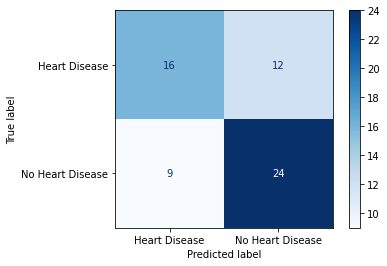

In [32]:
plot_confusion_matrix(dt_model, 
                      X_test, 
                      y_test, 
                      display_labels=["Heart Disease", "No Heart Disease"],
                      cmap='Blues')
plt.show()

In [33]:
class_report = classification_report(y_test, 
                                     y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.57      0.60        28
           1       0.67      0.73      0.70        33

    accuracy                           0.66        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.65      0.66      0.65        61



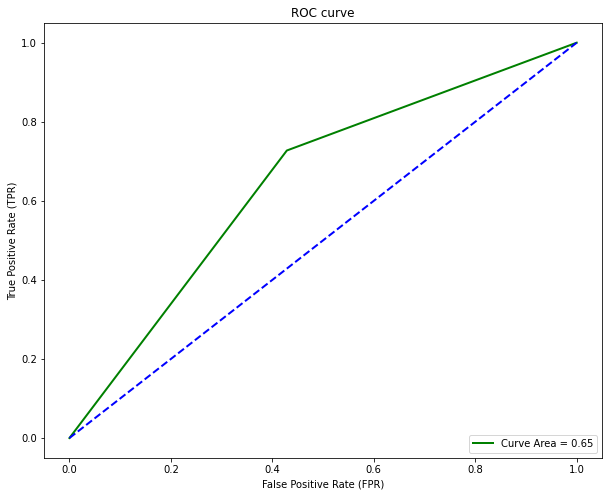

In [34]:
fpr, tpr, thr = roc_curve(y_test, 
                          y_pred)
auc = np.round(roc_auc_score(y_test, 
                             y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

##Explain your outcome